# Part 1: Data preparation

In [1]:
import pandas as pd
data = pd.read_csv("/home/atiyeh/Documents/AmirUsefi/ML/ml/ml/ToyotaCorolla.csv")
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [3]:
#Convert the categorical variables to dummy variables

dummy_fuel = pd.get_dummies(data['FuelType'], drop_first='True')

In [6]:
# Concat dummy varibles to main data frame

data = pd.concat([data, dummy_fuel], axis=1)
data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight', 'Diesel', 'Petrol'],
      dtype='object')

In [12]:
# Drop categorical variable FulelType

data=data_new.drop('FuelType', axis=1)
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'Diesel', 'Petrol'],
      dtype='object')

# Part 2: Data analysis

In [18]:
import seaborn as sns

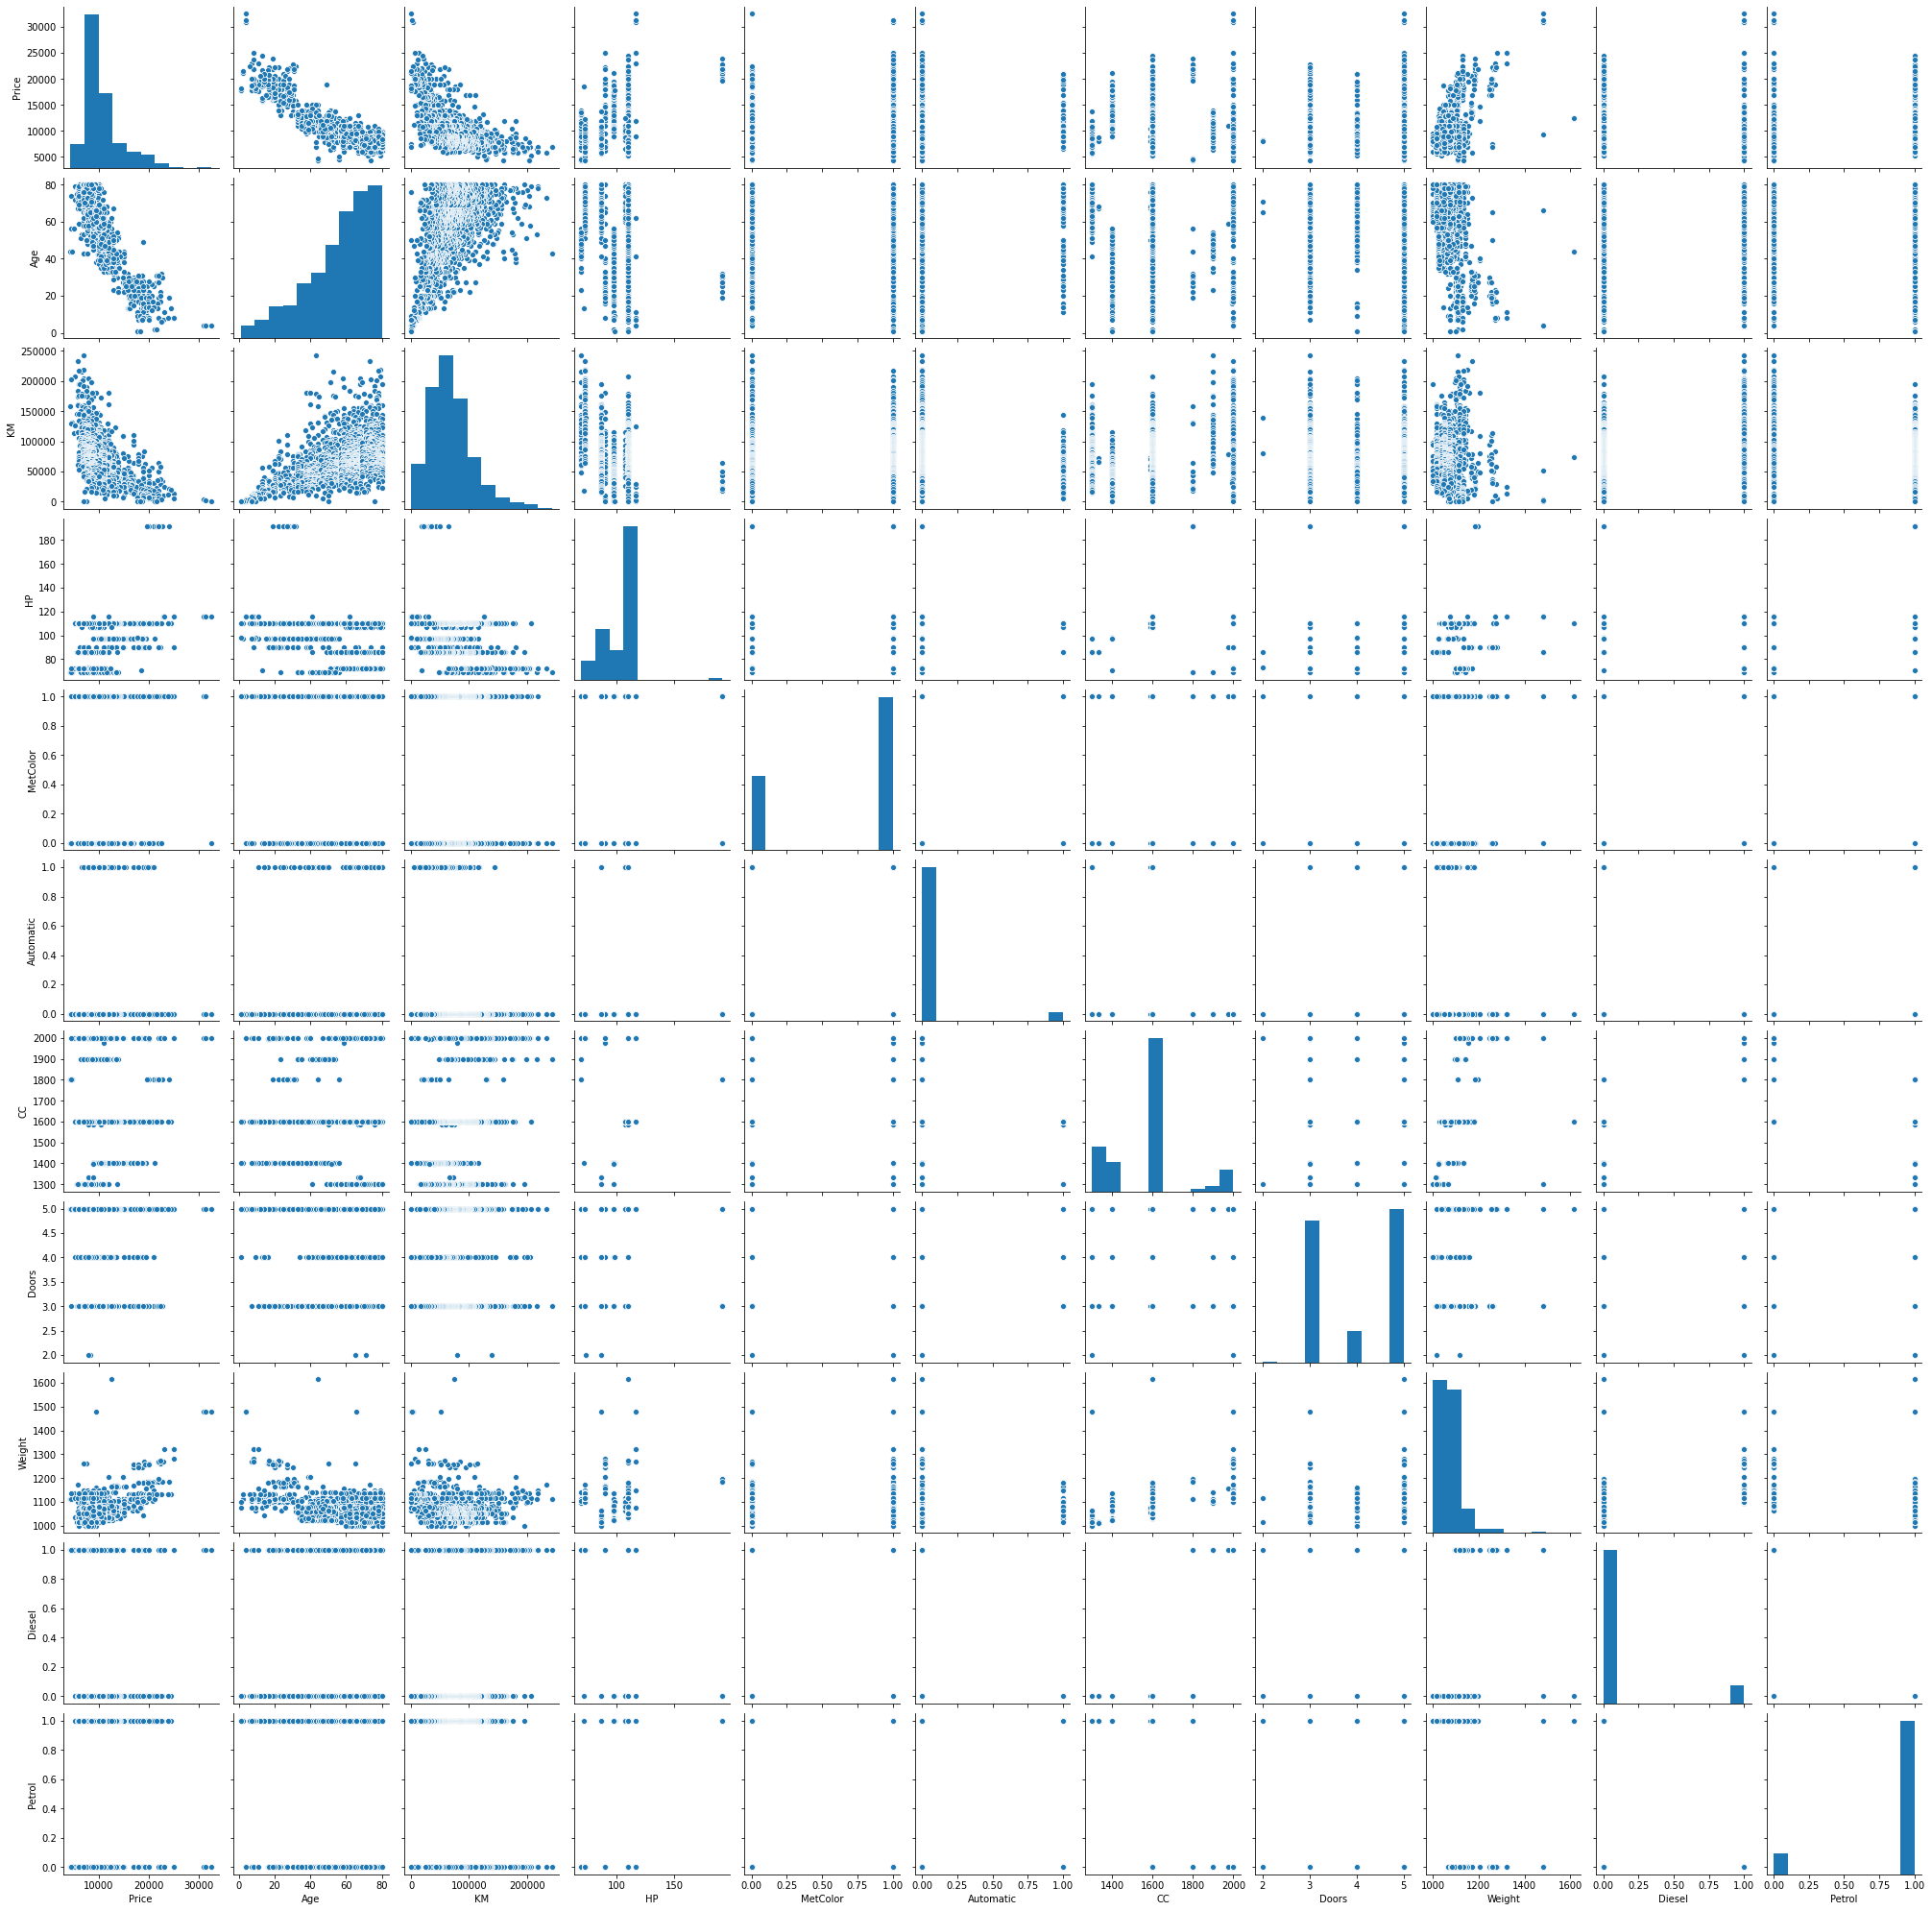

In [20]:
sns.pairplot(data)

## Check for outliers & dependencies

### Box plot

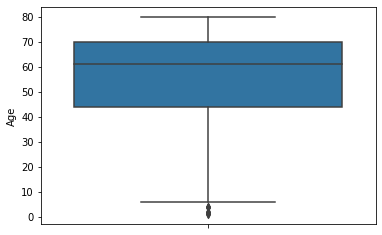

In [23]:
sns.boxplot(x='Age', data=data, orient='v')

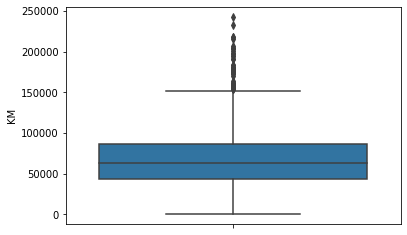

In [24]:
sns.boxplot(x='KM', data=data, orient='v')

### Scatter plot (check dependency)

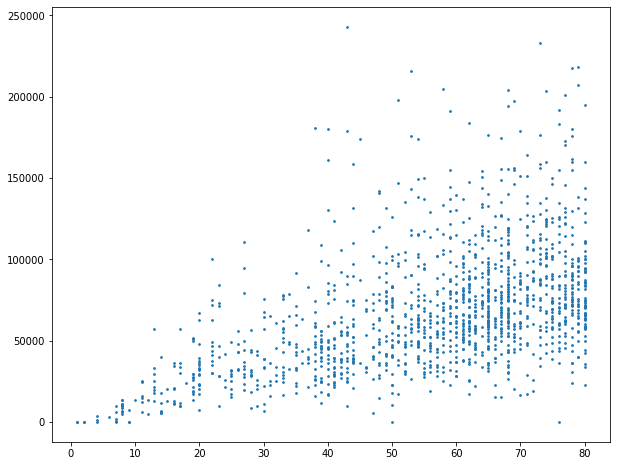

In [25]:
import matplotlib.pyplot as plt
# the age of the vehicle increases, so does the distance(KM)
plt.figure(figsize=(10,8))
plt.scatter(x=data['Age'], y=data['KM'], s=3)

# Part 3: Data Spliting

In [26]:
y = data['Price']
x = data.iloc[:,1:]

In [27]:
type(x)

pandas.core.frame.DataFrame

In [28]:
x.columns

Index(['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight',
       'Diesel', 'Petrol'],
      dtype='object')

In [29]:
type(y)

pandas.core.series.Series

In [30]:
y.column = 'Price'

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state=365)

# Part 4: Modelling

## Check for variables significance

In [32]:
import statsmodels.api as sm

In [35]:
model = sm.OLS(y_train, x_train)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              6931.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:24:52   Log-Likelihood:                         -8669.9
No. Observations:                1005   AIC:                                  1.736e+04
Df Residuals:                     995   BIC:                                  1.741e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As MetColor & Doors have p-value > 0.05 and their intervals contain zero, they are not important varibles to estimate Price.
Therefore, we will remove them!

In [37]:
x_new=x.drop(['MetColor','Doors'],axis=1)
x_new.columns

Index(['Age', 'KM', 'HP', 'Automatic', 'CC', 'Weight', 'Diesel', 'Petrol'], dtype='object')

In [38]:
x_new_train, x_new_test, y_train_new, y_test_new = train_test_split(x_new, y, test_size = 0.3)

##  Linear Regression ( ordinary least square)
Minimizes the objective function: ||y - Xw||^2_2 

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_new_train,y_train_new)
lr_predict = lr.predict(x_new_test)

### Evaluation

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

In [41]:
r2_score(y_test_new, lr_predict)

0.8615960734000362

In [42]:
mean_squared_error(y_test_new,lr_predict)

2026521.9708215925

In [43]:
explained_variance_score(y_test_new,lr_predict)

0.8620019402400911

### Params

In [88]:
names = [name for name in x_new_train.columns]
names.insert(0, 'intercept')
params = [lr.intercept_]
params.extend(lr.coef_)
pd.DataFrame(list(zip(names, params)), columns = ['Names', 'Co-efficients'])


,Names,Co-efficients
0,intercept,-5967.654640
1,Age,-120.146751
2,KM,-0.014936
3,HP,55.544076
4,Automatic,364.247136
5,CC,-3.909039
6,Weight,22.108683
7,Diesel,2748.172102
8,Petrol,1052.545300


## Ridge Regression
Minimizes the objective function: ||y - Xw||^2_2 + alpha * ||w||^2_2

In [89]:
 from sklearn.linear_model import Ridge
rr = Ridge(alpha=1.0)
rr.fit(x_new_train,y_train_new)
rr_predict = rr.predict(x_new_test)

### Evaluation

In [73]:
r2_score(y_test_new, rr_predict)

0.8607759435050492

In [74]:
mean_squared_error(y_test_new,rr_predict)

2038530.3819407553

In [75]:
explained_variance_score(y_test_new,rr_predict)

0.861203234822262

### Params

In [90]:
names = [name for name in x_new_train.columns]
names.insert(0, 'intercept')
params = [rr.intercept_]
params.extend(rr.coef_)
pd.DataFrame(list(zip(names, params)), columns = ['Names', 'Co-efficients'])

,Names,Co-efficients
0,intercept,-6125.136167
1,Age,-120.180383
2,KM,-0.015024
3,HP,52.088880
4,Automatic,341.348202
5,CC,-3.587728
6,Weight,22.391121
7,Diesel,2202.778487
8,Petrol,791.822161


## Lasso Regression
The optimization objective for Lasso is: (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [91]:
 from sklearn.linear_model import Lasso
lsr = Lasso(alpha=1.0)
lsr.fit(x_new_train,y_train_new)
lsr_predict = lsr.predict(x_new_test)

### Evaluation

In [92]:
r2_score(y_test_new, lsr_predict)

0.8612153696230945

In [93]:
mean_squared_error(y_test_new,lsr_predict)

2032096.2676446661

In [94]:
explained_variance_score(y_test_new,lsr_predict)

0.8616340656731025

### Params

In [95]:
names = [name for name in x_new_train.columns]
names.insert(0, 'intercept')
params = [lsr.intercept_]
params.extend(lsr.coef_)
pd.DataFrame(list(zip(names, params)), columns = ['Names', 'Co-efficients'])

,Names,Co-efficients
0,intercept,-5978.305724
1,Age,-120.091231
2,KM,-0.015033
3,HP,53.919948
4,Automatic,336.617053
5,CC,-3.762938
6,Weight,22.244203
7,Diesel,2437.958730
8,Petrol,870.963935


# Part 5: Evaluation of regularization params

## Lasso Regression

In [100]:
lasso_alpha = [i for i in range(1, 10)]
lasso_mse = []

In [101]:
for a in lasso_alpha : 
    lsr = Lasso(alpha=a)
    lsr.fit(x_new_train,y_train_new)
    lsr_predict = lsr.predict(x_new_test)
    lasso_mse.append(mean_squared_error(y_test_new,lsr_predict))

Text(0, 0.5, 'MSE')

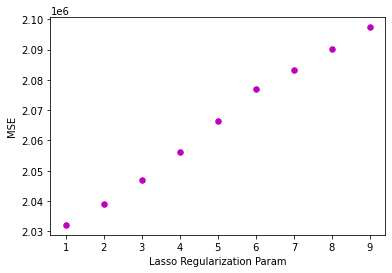

In [107]:
plt.scatter(lasso_alpha, lasso_mse, color = "m", marker = "o", s = 30) 
plt.xlabel('Lasso Regularization Param') 
plt.ylabel('MSE') 
  

## Ridge Regression

In [117]:
ridge_alpha = [i for i in range(1, 10)]
ridge_mse = []

In [118]:
for a in ridge_alpha:
    rr = Ridge(alpha=a)
    rr.fit(x_new_train,y_train_new)
    rr_predict = rr.predict(x_new_test)
    ridge_mse.append(mean_squared_error(y_test_new,rr_predict))

Text(0, 0.5, 'MSE')

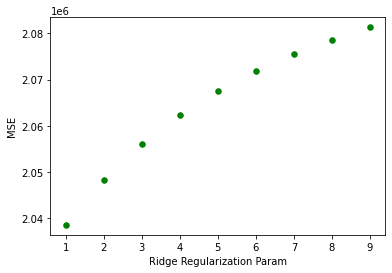

In [119]:
plt.scatter(ridge_alpha, ridge_mse, color = "g", marker = "o", s = 30) 
plt.xlabel('Ridge Regularization Param') 
plt.ylabel('MSE') 

## Observation
As the regularization param increses, the MSE increses!

# Part 6: Questions & Answers

1. Why MSE is not a good error  measurement? Because MSE does not necessarily increase with the variance of the errors.
 